**Pendahuluan**

Nama :Tiffani Asri , NIM :2211513013
Nama :Yumi Siti Amanah , NIM :2211513041

Judul : "Waspada Sejak Dini: Prediksi Risiko Penyakit Jantung dengan SVM"

Latar Belakang : Penyakit jantung merupakan penyebab kematian tertinggi kedua di Indonesia pada tahun 2019, dengan angka kasus mencapai 95,68 per 100.000 penduduk, hanya terpaut sedikit di bawah stroke. Kondisi ini sering muncul tanpa gejala jelas dan dapat menyebabkan kematian mendadak. Oleh karena itu, dibutuhkan sistem pendeteksian dini yang mampu mengenali risiko penyakit jantung sebelum gejala serius muncul. Melalui pendekatan machine learning, kita dapat memanfaatkan data kesehatan masyarakat untuk membangun sistem prediktif yang cepat, akurat, dan non-invasif guna mendukung pencegahan dan penanganan dini penyakit jantung.

Tujuan : Membangun sistem cerdas berbasis machine learning untuk memprediksi risiko penyakit jantung menggunakan data kesehatan masyarakat, sehingga dapat mendukung deteksi dini dan membantu proses pencegahan serta pengambilan keputusan medis secara lebih akurat.


**📁1. Dataset (Load dan Inspect Data)**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Load dataset dari file CSV dengan delimiter titik koma
df = pd.read_csv('/content/heart disease.csv', sep=';')

# Tampilkan 5 baris pertama untuk melihat isi data
print(df.head())

# Tampilkan daftar nama kolom (fitur) pada dataset
print(df.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  heartdisease  
0   2     3             0  
1   0     3             0  
2   0     3             0  
3   1     3             0  
4   3     2             0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease'],
      dtype='object')


In [22]:
# Tampilkan informasi umum dataset: jumlah data, tipe data, dan non-null count
print(df.info())

# Tampilkan jumlah missing values (jika ada) di setiap kolom
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1025 non-null   int64  
 1   sex           1025 non-null   int64  
 2   cp            1025 non-null   int64  
 3   trestbps      1025 non-null   int64  
 4   chol          1025 non-null   int64  
 5   fbs           1025 non-null   int64  
 6   restecg       1025 non-null   int64  
 7   thalach       1025 non-null   int64  
 8   exang         1025 non-null   int64  
 9   oldpeak       1025 non-null   float64
 10  slope         1025 non-null   int64  
 11  ca            1025 non-null   int64  
 12  thal          1025 non-null   int64  
 13  heartdisease  1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exa

**📊2. EDA (Exploratory Data Analysis)**



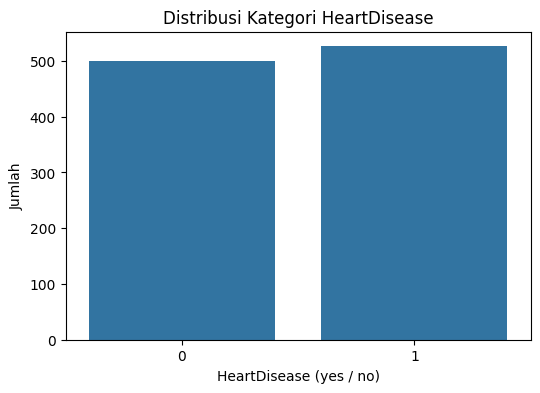


Jumlah masing-masing label:
heartdisease
1    526
0    499
Name: count, dtype: int64


In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='heartdisease')
plt.title("Distribusi Kategori HeartDisease")
plt.xlabel("HeartDisease (yes / no)")
plt.ylabel("Jumlah")
plt.show()

# Jumlah kategori
print("\nJumlah masing-masing label:")
print(df['heartdisease'].value_counts())


Pada tahap preprocessing awal/EDA, distribusi target menunjukkan bahwa mayoritas responden tidak memiliki riwayat penyakit jantung, sehingga data bersifat tidak seimbang (imbalanced).


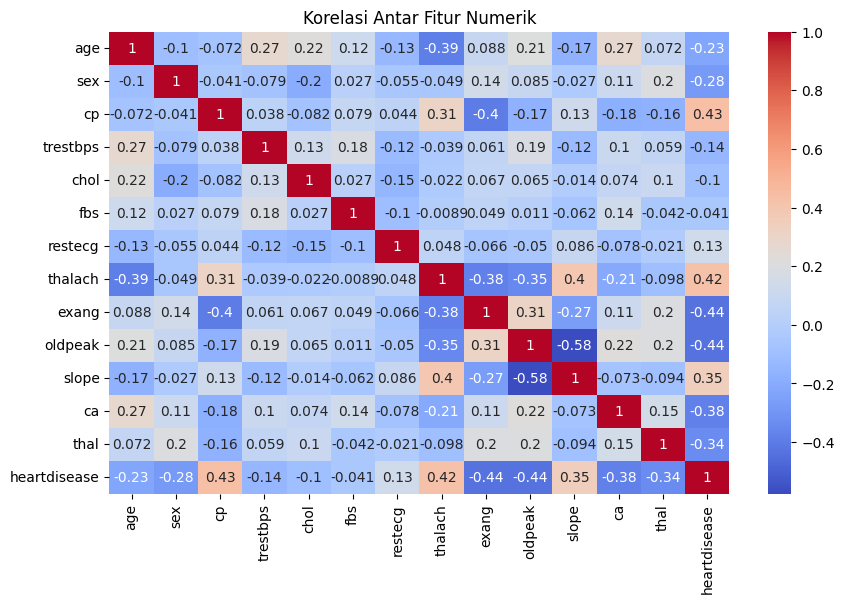

In [24]:
# Ambil fitur numerik
numeric_features = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


Korelasi antar fitur numerik digunakan untuk melihat sejauh mana hubungan linier antar variabel, khususnya antara fitur dan target heartdisease. Dari visualisasi heatmap di atas, dapat dilihat bahwa fitur cp (chest pain type) memiliki korelasi positif tertinggi terhadap penyakit jantung dengan nilai +0.43. Artinya, jenis nyeri dada tertentu cenderung lebih sering muncul pada pasien dengan penyakit jantung. Selain itu, fitur thalach (detak jantung maksimum) juga menunjukkan korelasi positif sebesar +0.42, menandakan bahwa semakin tinggi detak jantung maksimum yang dicapai, semakin besar kemungkinan terdiagnosa penyakit jantung. Fitur slope juga berkorelasi positif sebesar +0.35, menandakan kemiringan segmen ST pada EKG juga relevan.

Sebaliknya, terdapat beberapa fitur yang menunjukkan korelasi negatif cukup kuat dengan penyakit jantung. Di antaranya adalah oldpeak (depresi segmen ST) dengan korelasi −0.44, exang (angina akibat olahraga) sebesar −0.40, dan ca (jumlah pembuluh darah utama yang terlihat melalui pewarnaan) sebesar −0.38. Korelasi negatif ini menunjukkan bahwa nilai yang lebih tinggi pada fitur-fitur tersebut umumnya dimiliki oleh pasien yang tidak menderita penyakit jantung. Fitur thal juga memperlihatkan korelasi negatif −0.34, sementara sex dan age masing-masing berkorelasi −0.28 dan −0.23, menandakan bahwa meskipun jenis kelamin dan usia mempengaruhi, kontribusinya terhadap prediksi tidak sekuat fitur-fitur utama lainnya.

Secara keseluruhan, analisis ini membantu mengidentifikasi fitur-fitur paling berpengaruh dalam memprediksi risiko penyakit jantung, yang kemudian akan digunakan dalam proses pelatihan model machine learning selanjutnya.


**📦 3. Preprocessing**

In [55]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop('heartdisease', axis=1).columns.tolist()

In [56]:
# Salin dataframe untuk membersihkan outlier
df_cleaned = df.copy()
for col in numeric_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

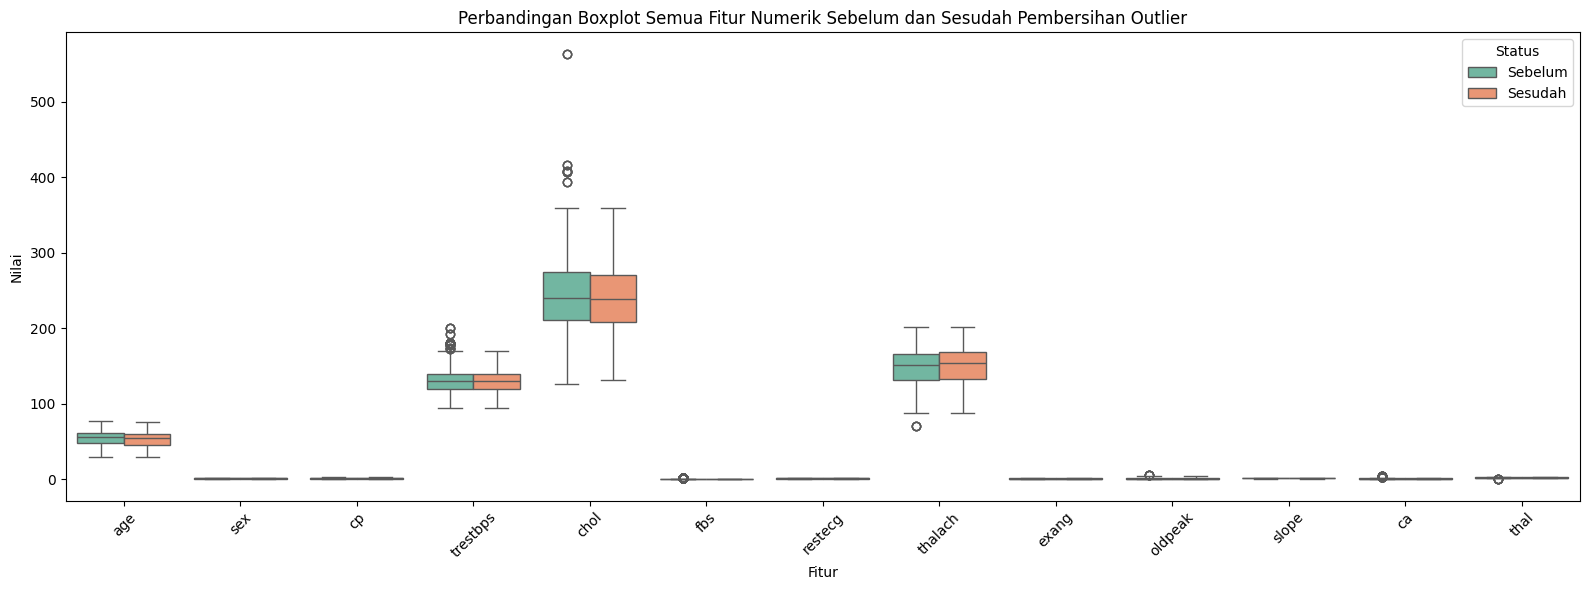

In [76]:
df["Status"] = "Sebelum"
df_cleaned["Status"] = "Sesudah"
combined_df = pd.concat([df, df_cleaned])
melted_df = pd.melt(
combined_df,
id_vars=["heartdisease", "Status"],
value_vars=numeric_features,
var_name="Fitur",
value_name="Nilai"
)
plt.figure(figsize=(16, 6))
sns.boxplot(
data=melted_df,
x="Fitur",
y="Nilai",
hue="Status",
palette="Set2"
)
plt.title("Perbandingan Boxplot Semua Fitur Numerik Sebelum dan Sesudah Pembersihan Outlier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pada tahap preprocessing, dilakukan analisis distribusi fitur numerik terhadap variabel target HeartDisease guna memahami pola dan karakteristik data sebelum dilanjutkan ke tahap pemodelan. Salah satu pendekatan yang digunakan adalah visualisasi dengan boxplot, yang sangat berguna untuk mengidentifikasi persebaran nilai data serta mendeteksi keberadaan outlier atau nilai pencilan. Outlier merupakan nilai yang secara signifikan berbeda dari sebagian besar data lainnya dan dapat memengaruhi performa model pembelajaran mesin jika tidak ditangani dengan baik.

Dari hasil visualisasi boxplot terhadap seluruh fitur numerik, tampak bahwa beberapa fitur seperti cholesterol (chol), resting blood pressure (trestbps), dan maximum heart rate achieved (thalach) mengandung nilai-nilai ekstrim yang tidak sesuai dengan sebaran mayoritas data. Keberadaan outlier ini berpotensi menyebabkan distorsi dalam proses pelatihan model, karena algoritma seperti Support Vector Machine (SVM) sangat sensitif terhadap skala dan distribusi data.

Untuk mengatasi hal tersebut, dilakukan proses pembersihan outlier menggunakan metode IQR (Interquartile Range), yaitu dengan menghapus data yang berada di bawah Q1 - 1.5IQR dan di atas Q3 + 1.5IQR pada setiap fitur numerik. Proses ini bertujuan untuk menjaga kualitas dan konsistensi data, serta menghindari bias akibat nilai-nilai ekstrem yang tidak representatif.

Setelah pembersihan, dilakukan kembali visualisasi boxplot terhadap fitur numerik yang telah dibersihkan. Hasilnya menunjukkan distribusi yang lebih seimbang dan minim pencilan, sehingga diharapkan dapat meningkatkan efektivitas proses pelatihan model. Dengan demikian, tahapan ini penting dalam memastikan bahwa data yang digunakan untuk prediksi HeartDisease sudah dalam kondisi optimal dan representatif.

In [73]:
print(f"Jumlah data sebelum dibersihkan: {len(df)}")
print(f"Jumlah data setelah dibersihkan: {len(df_cleaned)}")

Jumlah data sebelum dibersihkan: 1025
Jumlah data setelah dibersihkan: 769


In [57]:
X = df_cleaned.drop("heartdisease", axis=1)
y = df_cleaned["heartdisease"]

In [58]:
categorical_features = X.select_dtypes(include='object').columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [69]:
# Split data latih dan uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [70]:
# Preprocessing: one-hot encoding dan scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

**🧠 4. SVM Model**

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model = make_pipeline(preprocessor, SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True))
model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  []),
                                                 ('num', StandardScaler(),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])])),
                ('svc', SVC(class_weight='balanced', probability=True))])

**📈 5. Evaluasi & Prediksi**

Accuracy: 0.935064935064935

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.94      0.94      0.94        85

    accuracy                           0.94       154
   macro avg       0.93      0.93      0.93       154
weighted avg       0.94      0.94      0.94       154



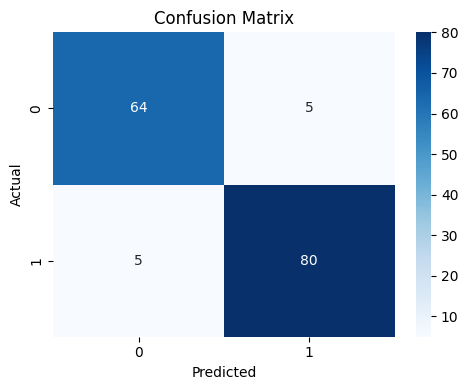

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [82]:
#Prediksi Data Baru
data_baru = pd.DataFrame({
'age': [54],
'sex': ['1'],
'cp': ['2'],
'trestbps': [130],
'chol': [250],
'fbs': ['0'],
'restecg': ['1'],
'thalach': [175],
'exang': ['0'],
'oldpeak': [1.0],
'slope': ['0'],
'ca': ['0'],
'thal': ['1']
})
prediksi = model.predict(data_baru)
hasil = "Mengidap penyakit jantung" if prediksi[0] == 1 else "Tidak mengidap penyakit jantung"
print("Hasil Prediksi:", hasil)

Hasil Prediksi: Mengidap penyakit jantung


**Kesimpulan**

Berdasarkan hasil evaluasi model Support Vector Machine (SVM) yang dibangun, sistem berhasil mencapai akurasi prediksi sebesar 93% terhadap data uji. Selain mampu membedakan dengan baik antara individu yang berisiko dan tidak berisiko terhadap penyakit jantung, model ini juga terbukti efektif dalam mengklasifikasikan data baru yang belum pernah dilatih sebelumnya. Hal ini menunjukkan bahwa metode yang digunakan mampu menggeneralisasi dengan baik dan berpotensi untuk diterapkan dalam sistem pendukung keputusan medis.